## Building and saving a deep neural network model to predict historical closing prices

In [12]:
#Importing Libraries

import pandas_datareader as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path

In [2]:
#Extracting Data

ticker = '^NDX'

start = dt.datetime(2020,1,1)
end = dt.datetime(2021,11,1)

df = web.DataReader(ticker, 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,15710.790039,15518.589844,15615.360352,15559.490234,7035470000,15559.490234
2021-10-27,15729.750000,15578.679688,15603.160156,15598.389648,6083210000,15598.389648
2021-10-28,15784.000000,15650.009766,15674.389648,15778.160156,5660240000,15778.160156
2021-10-29,15856.900391,15638.740234,15638.740234,15850.469727,5310370000,15850.469727
2021-11-01,15910.349609,15785.309570,15879.610352,15905.280273,5239250000,15905.280273


In [3]:
#Setting features and target variables 

X = df.drop(columns=["Close"])
y = df["Close"]

X = np.array(X).reshape(-1,5)
y = np.array(y).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X).reshape(-1,5)
y_scaled = scaler.fit_transform(y).reshape(-1,1)



In [5]:
#Building a deep neural network model.

nn = Sequential()

#First Layer
nn.add(Dense(units=8, input_dim=5, activation='relu' ))

#Second Layer
nn.add(Dense(units=4, activation='relu'))

#Third Layer
nn.add(Dense(units=2, activation='relu'))

#Output Layer
nn.add(Dense(units=1, activation='linear'))

In [6]:
#Compiling the model

nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [7]:
# Fitting the model

model = nn.fit(X_scaled,y_scaled, validation_split=0.2, epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 38ms/step - loss: 0.0835 - mse: 0.0835 - val_loss: 0.2150 - val_mse: 0.2150
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0342 - mse: 0.0342 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0417 - val_mse: 0.0417
Epoch 6/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0179 - val_mse: 0.0179
Epoch 8/100
12/12 [==============================] - 0s 24ms/step - loss: 0.

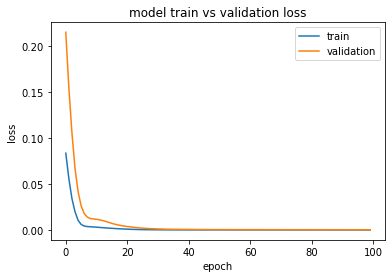

In [8]:
#Visualizing model training vs validation loss

plt.plot(nn.history.history['loss'])
plt.plot(nn.history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [18]:
#Model Evaluation

nn.evaluate(X,y)

15/15 [==============================] - 0s 6ms/step - loss: 1.6276e-04 - mse: 1.6276e-04


[0.00016276113456115127, 0.00016276113456115127]

<AxesSubplot:title={'center':'Predicted Prices vs Actual Prices'}, xlabel='Date'>

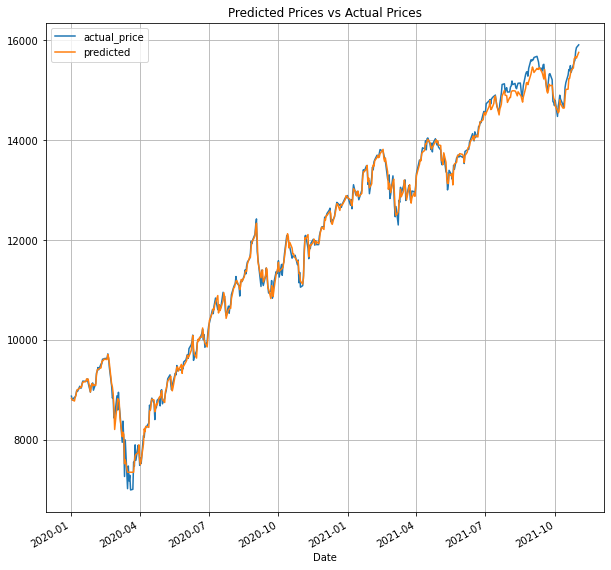

In [10]:
# Making predictions
predicted = nn.predict(X)

predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

df['predicted'] = predicted_prices

a = df["Close"].to_frame()
a = a.rename(columns={
    'Close' : 'actual_price'
})

b = df["predicted"].to_frame()

a = a.join(b, how="inner")
a.plot(figsize=(10,10), title="Predicted Prices vs Actual Prices", grid=True)

In [13]:
# Save model as JSON
nn_json = nn.to_json()
file_path = Path("ndx_model.json")
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "ndx_model.h5"
nn.save_weights(file_path)